<a href="https://colab.research.google.com/github/baseballtrout/BaseballAgent/blob/main/Baseball_pitching_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data cleaning and preprocessing
#Using pybaseball 2024 MLB data

In [1]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 28.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pybaseball as pyb

In [3]:
from pybaseball import pitching_stats

pitching_data = pitching_stats(2024, qual=100)
pitching_data

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
2,10603,2024,Chris Sale,ATL,35,18,3,6.4,2.38,29,...,NaN,NaN,NaN,NaN,104,111,110,NaN,NaN,NaN
3,22267,2024,Tarik Skubal,DET,27,18,4,5.9,2.39,31,...,NaN,NaN,NaN,NaN,112,100,112,NaN,NaN,NaN
4,10310,2024,Zack Wheeler,PHI,34,16,7,5.4,2.57,32,...,96.0,94.0,101.0,91.0,110,104,113,NaN,NaN,NaN
20,21846,2024,Cole Ragans,KCR,26,11,9,4.9,3.14,32,...,100.0,NaN,NaN,NaN,110,99,110,NaN,NaN,NaN
35,18525,2024,Dylan Cease,SDP,28,14,11,4.8,3.47,33,...,92.0,NaN,NaN,NaN,110,104,113,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,11589,2024,Jose Urena,TEX,32,5,8,0.1,3.80,33,...,NaN,NaN,NaN,NaN,93,100,96,NaN,NaN,NaN
122,6632,2024,Carlos Carrasco,CLE,37,3,10,0.1,5.64,21,...,NaN,NaN,NaN,NaN,84,98,86,NaN,NaN,NaN
124,18498,2024,Kenta Maeda,DET,36,3,7,0.0,6.09,29,...,109.0,98.0,112.0,110.0,92,104,99,NaN,NaN,NaN
73,19990,2024,Bryse Wilson,MIL,26,5,4,-0.2,4.04,34,...,100.0,NaN,NaN,NaN,102,98,98,NaN,NaN,NaN


In [4]:
statcast_data2 = pyb.statcast(start_dt='2024-03-30', end_dt='2024-8-30')
statcast_data2

This is a large query, it may take a moment to complete


/usr/local/lib/python3.11/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/154 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_co

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
2209,SL,2024-08-30,86.6,2.87,5.35,"Banda, Anthony",641645,607455,field_out,hit_into_play,...,1,0,1,2,3,1,2.7,-0.77,-0.77,36.6
2262,SL,2024-08-30,85.0,3.15,5.3,"Banda, Anthony",641645,607455,NaN,called_strike,...,1,0,1,2,3,1,2.81,-0.6,-0.6,32.6
2310,FF,2024-08-30,96.7,2.83,5.44,"Banda, Anthony",641645,607455,NaN,called_strike,...,1,0,1,2,3,1,1.15,0.89,0.89,37.7
2390,FF,2024-08-30,94.7,2.96,5.33,"Banda, Anthony",682998,607455,field_out,hit_into_play,...,1,4,1,1,3,1,1.27,0.9,0.9,30.9
2427,FF,2024-08-30,96.5,2.9,5.26,"Banda, Anthony",682998,607455,NaN,ball,...,1,4,1,1,3,1,1.34,1.2,1.2,32.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,FF,2024-03-30,91.4,0.57,6.16,"Bradford, Cody",663538,674003,strikeout,called_strike,...,1,0,<NA>,2,6,1,1.14,0.33,-0.33,56.4
4243,FF,2024-03-30,91.1,0.46,6.21,"Bradford, Cody",663538,674003,NaN,foul,...,1,0,<NA>,2,6,1,1.12,0.74,-0.74,64.8
4448,CH,2024-03-30,81.8,0.88,6.14,"Bradford, Cody",663538,674003,NaN,foul,...,1,0,<NA>,2,6,1,2.03,1.18,-1.18,47.2
4490,CH,2024-03-30,81.7,0.89,6.09,"Bradford, Cody",663538,674003,NaN,swinging_strike,...,1,0,<NA>,2,6,1,2.37,1.32,-1.32,48.0


In [ ]:
statcast_data2

In [ ]:
statcast_data2.columns.to_list()

In [23]:
filtered_data = statcast_data2[[
    'pitch_type', 'release_speed', 'inning', 'outs_when_up', 'stand', 'p_throws',
    'description','balls','strikes','bb_type','hit_location','events','player_name'
]]

In [ ]:
filtered_data.head()

In [ ]:
filtered_data['events'].unique()

In [ ]:
filtered_data['pitch_type'].unique()

array(['SL', 'FF', 'SI', 'CH', 'ST', 'FC', 'CU', 'KC', 'FS', 'FA', 'KN',
       'SV', 'SC', 'PO', 'EP', 'CS', nan, 'FO'], dtype=object)

In [ ]:
 rows_with_na = filtered_data[filtered_data.isna().any(axis=1)]
 rows_with_na

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,description,balls,strikes,bb_type,hit_location,events,player_name
2275,SL,85.0,9,2,L,L,called_strike,0,1,NaN,<NA>,NaN,"Banda, Anthony"
2312,FF,96.7,9,2,L,L,called_strike,0,0,NaN,<NA>,NaN,"Banda, Anthony"
2443,FF,96.5,9,1,L,L,ball,2,1,NaN,<NA>,NaN,"Banda, Anthony"
2497,FF,96.4,9,1,L,L,called_strike,2,0,NaN,<NA>,NaN,"Banda, Anthony"
2571,SL,85.2,9,1,L,L,ball,1,0,NaN,<NA>,NaN,"Banda, Anthony"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,FF,91.4,1,0,R,L,called_strike,1,2,NaN,2,strikeout,"Bradford, Cody"
4141,FF,91.1,1,0,R,L,foul,1,2,NaN,<NA>,NaN,"Bradford, Cody"
4342,CH,81.8,1,0,R,L,foul,1,1,NaN,<NA>,NaN,"Bradford, Cody"
4588,CH,81.7,1,0,R,L,swinging_strike,1,0,NaN,<NA>,NaN,"Bradford, Cody"


In [ ]:
filtered_data.head()

In [ ]:
filtered_data

In [ ]:
filtered_data['description'].unique()

array(['hit_into_play', 'called_strike', 'ball', 'swinging_strike',
       'foul', 'blocked_ball', 'foul_tip', 'swinging_strike_blocked',
       'hit_by_pitch', 'bunt_foul_tip', 'foul_bunt', 'missed_bunt',
       'pitchout'], dtype=object)

In [ ]:
filtered_data['bb_type'].unique()

array(['fly_ball', nan, 'popup', 'ground_ball', 'line_drive'],
      dtype=object)

In [ ]:
filtered_data['events'].unique()

array(['field_out', nan, 'home_run', 'single', 'strikeout', 'double',
       'walk', 'grounded_into_double_play', 'hit_by_pitch', 'sac_fly',
       'sac_fly_double_play', 'force_out', 'truncated_pa', 'field_error',
       'triple', 'catcher_interf', 'fielders_choice', 'sac_bunt',
       'double_play', 'strikeout_double_play', 'fielders_choice_out',
       'triple_play'], dtype=object)

In [24]:
def combine_result(row):
    # Use 'events' if it exists
    if pd.notna(row['events']):
        return row['events']
    # If 'events' is missing, try 'description'
    elif pd.notna(row['description']):
        return row['description']
    # If both are missing, use 'bb_type'
    elif pd.notna(row['bb_type']):
        return row['bb_type']
    else:
        return 'unknown'

# Apply the function
filtered_data['Pitch_result'] = filtered_data.apply(combine_result, axis=1)

<ipython-input-24-1a377382ee45>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Pitch_result'] = filtered_data.apply(combine_result, axis=1)


In [ ]:
filtered_data.head()

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,description,balls,strikes,bb_type,hit_location,events,player_name,Pitch_result
2212,SL,86.6,9,2,L,L,hit_into_play,0,2,fly_ball,7,field_out,"Banda, Anthony",field_out
2262,SL,85.0,9,2,L,L,called_strike,0,1,NaN,<NA>,NaN,"Banda, Anthony",called_strike
2348,FF,96.7,9,2,L,L,called_strike,0,0,NaN,<NA>,NaN,"Banda, Anthony",called_strike
2379,FF,94.7,9,1,L,L,hit_into_play,3,1,popup,5,field_out,"Banda, Anthony",field_out
2430,FF,96.5,9,1,L,L,ball,2,1,NaN,<NA>,NaN,"Banda, Anthony",ball


In [25]:
filtered_data.drop(columns=['events','description','bb_type'],inplace=True)

<ipython-input-25-6bdf7c438f4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['events','description','bb_type'],inplace=True)


In [ ]:
filtered_data['Pitch_result'].unique()

array(['field_out', 'called_strike', 'ball', 'home_run',
       'swinging_strike', 'single', 'foul', 'blocked_ball', 'foul_tip',
       'strikeout', 'double', 'walk', 'grounded_into_double_play',
       'hit_by_pitch', 'bunt_foul_tip', 'sac_fly', 'sac_fly_double_play',
       'force_out', 'truncated_pa', 'field_error', 'triple', 'foul_bunt',
       'swinging_strike_blocked', 'catcher_interf', 'fielders_choice',
       'sac_bunt', 'double_play', 'strikeout_double_play', 'missed_bunt',
       'fielders_choice_out', 'pitchout', 'triple_play'], dtype=object)

In [ ]:
filtered_data.head()

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,balls,strikes,hit_location,player_name,Pitch_result
2245,SL,86.6,9,2,L,L,0,2,7,"Banda, Anthony",field_out
2275,SL,85.0,9,2,L,L,0,1,<NA>,"Banda, Anthony",called_strike
2312,FF,96.7,9,2,L,L,0,0,<NA>,"Banda, Anthony",called_strike
2360,FF,94.7,9,1,L,L,3,1,5,"Banda, Anthony",field_out
2443,FF,96.5,9,1,L,L,2,1,<NA>,"Banda, Anthony",ball


In [26]:
filtered_data.drop(columns=['hit_location'],inplace=True)

<ipython-input-26-ebad70591c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['hit_location'],inplace=True)


In [ ]:
filtered_data

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,balls,strikes,player_name,Pitch_result
2212,SL,86.6,9,2,L,L,0,2,"Banda, Anthony",field_out
2262,SL,85.0,9,2,L,L,0,1,"Banda, Anthony",called_strike
2348,FF,96.7,9,2,L,L,0,0,"Banda, Anthony",called_strike
2379,FF,94.7,9,1,L,L,3,1,"Banda, Anthony",field_out
2430,FF,96.5,9,1,L,L,2,1,"Banda, Anthony",ball
...,...,...,...,...,...,...,...,...,...,...
4054,FF,91.4,1,0,R,L,1,2,"Bradford, Cody",strikeout
4196,FF,91.1,1,0,R,L,1,2,"Bradford, Cody",foul
4440,CH,81.8,1,0,R,L,1,1,"Bradford, Cody",foul
4475,CH,81.7,1,0,R,L,1,0,"Bradford, Cody",swinging_strike


In [ ]:
filtered_data.isna().sum()

,0
pitch_type,285
release_speed,286
inning,0
outs_when_up,0
stand,0
p_throws,0
balls,0
strikes,0
player_name,0
Pitch_result,0


In [ ]:
 rows_with_na2 = filtered_data[filtered_data.isna().any(axis=1)]
 rows_with_na2

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,balls,strikes,player_name,Pitch_result
1915,NaN,<NA>,2,1,R,L,2,2,"Skubal, Tarik",foul
1974,NaN,<NA>,2,1,R,L,2,2,"Skubal, Tarik",foul
1978,NaN,<NA>,2,1,R,L,1,2,"Skubal, Tarik",ball
2042,NaN,<NA>,2,1,R,L,1,1,"Skubal, Tarik",swinging_strike
2103,NaN,<NA>,2,1,R,L,1,0,"Skubal, Tarik",swinging_strike
...,...,...,...,...,...,...,...,...,...,...
2972,NaN,<NA>,1,2,L,R,2,2,"Hudson, Dakota",ball
9,NaN,<NA>,5,1,R,R,2,0,"Littell, Zack",single
4061,NaN,<NA>,1,0,L,R,1,2,"López, Reynaldo",strikeout
3324,NaN,<NA>,7,0,R,L,2,2,"Fleming, Josh",field_out


In [27]:
filtered_data['release_speed'] = filtered_data['release_speed'].fillna(filtered_data['release_speed'].median())

<ipython-input-27-6df442b8086f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['release_speed'] = filtered_data['release_speed'].fillna(filtered_data['release_speed'].median())


In [28]:
filtered_data['pitch_type'] = filtered_data['pitch_type'].fillna(filtered_data['pitch_type'].mode()[0])

<ipython-input-28-654e88f8e573>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pitch_type'] = filtered_data['pitch_type'].fillna(filtered_data['pitch_type'].mode()[0])


In [29]:
filtered_data.drop(columns=['player_name'],inplace=True)

<ipython-input-29-58e82e3d30e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['player_name'],inplace=True)


In [ ]:
filtered_data

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,balls,strikes,Pitch_result
2212,SL,86.6,9,2,L,L,0,2,field_out
2262,SL,85.0,9,2,L,L,0,1,called_strike
2348,FF,96.7,9,2,L,L,0,0,called_strike
2379,FF,94.7,9,1,L,L,3,1,field_out
2430,FF,96.5,9,1,L,L,2,1,ball
...,...,...,...,...,...,...,...,...,...
4054,FF,91.4,1,0,R,L,1,2,strikeout
4196,FF,91.1,1,0,R,L,1,2,foul
4440,CH,81.8,1,0,R,L,1,1,foul
4475,CH,81.7,1,0,R,L,1,0,swinging_strike


In [ ]:
filtered_data['Pitch_result'].unique()
#encode for one hot vectors


array(['field_out', 'called_strike', 'ball', 'home_run',
       'swinging_strike', 'single', 'foul', 'blocked_ball', 'foul_tip',
       'strikeout', 'double', 'walk', 'grounded_into_double_play',
       'hit_by_pitch', 'bunt_foul_tip', 'sac_fly', 'sac_fly_double_play',
       'force_out', 'truncated_pa', 'field_error', 'triple', 'foul_bunt',
       'swinging_strike_blocked', 'catcher_interf', 'fielders_choice',
       'sac_bunt', 'double_play', 'strikeout_double_play', 'missed_bunt',
       'fielders_choice_out', 'pitchout', 'triple_play'], dtype=object)

In [ ]:
filtered_data['Pitch_result'].value_counts()


,count
Pitch_result,
ball,183522
foul,105833
called_strike,87960
field_out,61106
swinging_strike,40111
strikeout,33563
single,21319
walk,11855
blocked_ball,11409


In [30]:
# Mapping dictionary
outcome_mapping = {
    # Strikes
    'called_strike': 'strike',
    'swinging_strike': 'strike',
    'swinging_strike_blocked': 'strike',
    'foul': 'strike',
    'foul_tip': 'strike',
    'bunt_foul_tip': 'strike',
    'foul_bunt': 'strike',
    'missed_bunt': 'strike',

    # Balls
    'ball': 'ball',
    'blocked_ball': 'ball',
    'pitchout': 'ball',

    # Hits
    'single': 'hit',
    'double': 'hit',
    'triple': 'hit',
    'home_run': 'hit',

    # Outs
    'field_out': 'out',
    'strikeout': 'out',
    'strikeout_double_play': 'out',
    'force_out': 'out',
    'grounded_into_double_play': 'out',
    'double_play': 'out',
    'triple_play': 'out',
    'sac_fly': 'out',
    'sac_fly_double_play': 'out',
    'fielders_choice_out': 'out',

    # Walks / HBP / Interference
    'walk': 'walk',
    'hit_by_pitch': 'walk',
    'catcher_interf': 'walk',

    # Errors
    'field_error': 'error',

    # Other / Miscellaneous
    'truncated_pa': 'other',
    'fielders_choice': 'other',
    'sac_bunt': 'bunt',
}



In [31]:
# Apply the mapping
filtered_data['Pitch_outcome'] = filtered_data['Pitch_result'].map(outcome_mapping)

# Check for any outcomes not mapped
unmapped = filtered_data[filtered_data['Pitch_outcome'].isnull()]['Pitch_result'].unique()
print("Unmapped outcomes:", unmapped)


Unmapped outcomes: []


<ipython-input-31-88de03621999>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Pitch_outcome'] = filtered_data['Pitch_result'].map(outcome_mapping)


In [ ]:
filtered_data

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,balls,strikes,Pitch_result,Pitch_outcome
2212,SL,86.6,9,2,L,L,0,2,field_out,out
2262,SL,85.0,9,2,L,L,0,1,called_strike,strike
2348,FF,96.7,9,2,L,L,0,0,called_strike,strike
2379,FF,94.7,9,1,L,L,3,1,field_out,out
2430,FF,96.5,9,1,L,L,2,1,ball,ball
...,...,...,...,...,...,...,...,...,...,...
4054,FF,91.4,1,0,R,L,1,2,strikeout,out
4196,FF,91.1,1,0,R,L,1,2,foul,strike
4440,CH,81.8,1,0,R,L,1,1,foul,strike
4475,CH,81.7,1,0,R,L,1,0,swinging_strike,strike


In [32]:
filtered_data.drop(columns=['Pitch_result'],inplace=True)

<ipython-input-32-a460e6d14847>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['Pitch_result'],inplace=True)


In [ ]:
filtered_data

,pitch_type,release_speed,inning,outs_when_up,stand,p_throws,balls,strikes,Pitch_outcome
2212,SL,86.6,9,2,L,L,0,2,out
2262,SL,85.0,9,2,L,L,0,1,strike
2348,FF,96.7,9,2,L,L,0,0,strike
2379,FF,94.7,9,1,L,L,3,1,out
2430,FF,96.5,9,1,L,L,2,1,ball
...,...,...,...,...,...,...,...,...,...
4054,FF,91.4,1,0,R,L,1,2,out
4196,FF,91.1,1,0,R,L,1,2,strike
4440,CH,81.8,1,0,R,L,1,1,strike
4475,CH,81.7,1,0,R,L,1,0,strike


In [33]:
filtered_data.drop(columns=['stand','p_throws'],inplace=True)

<ipython-input-33-a136f77123d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['stand','p_throws'],inplace=True)


In [ ]:
filtered_data

,pitch_type,release_speed,inning,outs_when_up,balls,strikes,Pitch_outcome
2210,SL,86.6,9,2,0,2,out
2288,SL,85.0,9,2,0,1,strike
2304,FF,96.7,9,2,0,0,strike
2398,FF,94.7,9,1,3,1,out
2456,FF,96.5,9,1,2,1,ball
...,...,...,...,...,...,...,...
4101,FF,91.4,1,0,1,2,out
4259,FF,91.1,1,0,1,2,strike
4319,CH,81.8,1,0,1,1,strike
4583,CH,81.7,1,0,1,0,strike


In [34]:
filtered_data.to_csv('filtered_pitching4.csv')

In [35]:
baseball_data = pd.read_csv('filtered_pitching4.csv')

In [36]:
baseball_data

,Unnamed: 0,pitch_type,release_speed,inning,outs_when_up,balls,strikes,Pitch_outcome
0,2209,SL,86.6,9,2,0,2,out
1,2262,SL,85.0,9,2,0,1,strike
2,2310,FF,96.7,9,2,0,0,strike
3,2390,FF,94.7,9,1,3,1,out
4,2427,FF,96.5,9,1,2,1,ball
...,...,...,...,...,...,...,...,...
584969,4130,FF,91.4,1,0,1,2,out
584970,4243,FF,91.1,1,0,1,2,strike
584971,4448,CH,81.8,1,0,1,1,strike
584972,4490,CH,81.7,1,0,1,0,strike


In [37]:
numerical_cols = ['release_speed','inning']
categorical_cols = ['pitch_type','outs_when_up','balls','strikes']

In [38]:
X = filtered_data[['pitch_type','release_speed','inning','outs_when_up','balls', 'strikes']]
y= filtered_data['Pitch_outcome']

In [ ]:
y.value_counts()

,count
Pitch_outcome,
strike,239662
ball,194972
out,101896
hit,32952
walk,13643
error,916
other,555
bunt,378


In [19]:
!pip install pyro-ppl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 991.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [39]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop="first", sparse_output=False), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

In [41]:
outcome_encoder = {v: i for i, v in enumerate(y.unique())}
y_encoded = y.map(outcome_encoder).values

In [42]:
n_classes = len(outcome_encoder)
n_classes

8

In [53]:
y_encoded

array([0, 1, 1, ..., 1, 1, 2])

In [35]:
import numpy as np

means = np.mean(X_preprocessed, axis=0)
stds = np.std(X_preprocessed, axis=0)

print("Feature Means:\n", means)
print("Feature Standard Deviations:\n", stds)


Feature Means:
 [ 1.22003323e-15 -1.51658499e-15  3.41895537e-05  6.30028001e-02
  7.62427048e-04  8.66705187e-04  8.17557703e-02  3.18056871e-01
  2.18813144e-04  3.16680741e-02  1.74281250e-02  1.59836164e-03
  7.17980628e-05  1.81204635e-04  1.57581363e-01  1.55092363e-01
  6.51533231e-02  4.28907951e-03  3.31481399e-01  3.25597377e-01
  2.96006318e-01  1.66680912e-01  8.12548934e-02  3.04278481e-01
  3.00787727e-01]
Feature Standard Deviations:
 [1.         1.         0.00584708 0.242968   0.02760155 0.0294271
 0.27399227 0.4657217  0.01479072 0.17511484 0.13086018 0.03994755
 0.00847307 0.01346001 0.36434802 0.36199271 0.24679621 0.06535047
 0.47074567 0.46859762 0.45649379 0.37269074 0.27322616 0.46010117
 0.45860056]


In [43]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from torch.utils.data import TensorDataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight
from pyro.infer import TraceMeanField_ELBO

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to device
X_tensor = torch.tensor(X_preprocessed, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_encoded, dtype=torch.long).to(device)
dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_encoded),
                                     y=y_encoded)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Define Pyro model
def model(X, y=None):
    n_features = X.shape[1]
    n_classes = len(outcome_encoder)

    # Probabilistic weights on device
    #firsdt hidden
    w1 = pyro.sample("w1", dist.Normal(torch.zeros(n_features, 64, device=device),
                                       0.5 * torch.ones(n_features, 64, device=device)).to_event(2))
    b1 = pyro.sample("b1", dist.Normal(torch.zeros(64, device=device),
                                       0.5 * torch.ones(64, device=device)).to_event(1))

    #hidden layer
    w2 = pyro.sample("w2", dist.Normal(torch.zeros(64, 32, device=device),
                                       0.5 * torch.ones(64, 32, device=device)).to_event(2))
    b2 = pyro.sample("b2", dist.Normal(torch.zeros(32, device=device),
                                       0.5 * torch.ones(32, device=device)).to_event(1))
    # third hidden layer
    w3 = pyro.sample("w3", dist.Normal(torch.zeros(32, n_classes, device=device),
                                       0.5 * torch.ones(32, n_classes, device=device)).to_event(2))
    b3 = pyro.sample("b3", dist.Normal(torch.zeros(n_classes, device=device),
                                       0.5 * torch.ones(n_classes, device=device)).to_event(1))

    # Forward pass
    h1 = torch.relu(X @ w1 + b1)
    h1 = torch.nn.functional.dropout(h1, p=0.3)
    h2 = torch.relu(h1 @ w2 + b2)
    h2 = torch.nn.functional.dropout(h2, p=0.3)
    logits = h2 @ w3 + b3

    adjusted_logits = logits + torch.log(class_weights_tensor)

    # Output likelihood
    with pyro.plate("data", X.shape[0]):
        pyro.sample("obs", dist.Categorical(logits=adjusted_logits), obs=y)

# Guide
def guide(X, y=None):
    # First hidden layer
    w1_loc = pyro.param("w1_loc", torch.zeros(X.shape[1], 64, device=device))
    w1_scale = pyro.param("w1_scale", torch.ones(X.shape[1], 64, device=device), constraint=dist.constraints.positive)
    pyro.sample("w1", dist.Normal(w1_loc, w1_scale).to_event(2))

    b1_loc = pyro.param("b1_loc", torch.zeros(64, device=device))
    b1_scale = pyro.param("b1_scale", torch.ones(64, device=device), constraint=dist.constraints.positive)
    pyro.sample("b1", dist.Normal(b1_loc, b1_scale).to_event(1))

    # Second hidden layer
    w2_loc = pyro.param("w2_loc", torch.zeros(64, 32, device=device))
    w2_scale = pyro.param("w2_scale", torch.ones(64, 32, device=device), constraint=dist.constraints.positive)
    pyro.sample("w2", dist.Normal(w2_loc, w2_scale).to_event(2))

    b2_loc = pyro.param("b2_loc", torch.zeros(32, device=device))
    b2_scale = pyro.param("b2_scale", torch.ones(32, device=device), constraint=dist.constraints.positive)
    pyro.sample("b2", dist.Normal(b2_loc, b2_scale).to_event(1))

    # Output layer
    w3_loc = pyro.param("w3_loc", torch.zeros(32, len(outcome_encoder), device=device))
    w3_scale = pyro.param("w3_scale", torch.ones(32, len(outcome_encoder), device=device), constraint=dist.constraints.positive)
    pyro.sample("w3", dist.Normal(w3_loc, w3_scale).to_event(2))

    b3_loc = pyro.param("b3_loc", torch.zeros(len(outcome_encoder), device=device))
    b3_scale = pyro.param("b3_scale", torch.ones(len(outcome_encoder), device=device), constraint=dist.constraints.positive)
    pyro.sample("b3", dist.Normal(b3_loc, b3_scale).to_event(1))




# Training
pyro.clear_param_store()
svi = SVI(model, guide, pyro.optim.Adam({"lr": 0.0005}), loss=Trace_ELBO()) #Trace_ELBO #TraceMeanField_ELBO
for epoch in range(4):
    loss = 0
    for X_batch, y_batch in loader:
        loss += svi.step(X_batch, y_batch)
    print(f"Epoch {epoch}, Loss: {loss / len(dataset):.4f}")


Epoch 0, Loss: 24.0291
Epoch 1, Loss: 5.9373
Epoch 2, Loss: 5.9348
Epoch 3, Loss: 5.9319


In [44]:

# mke analysis for result
# Get the raw probabilities
def predict(X):
    predictive = pyro.infer.Predictive(model, guide=guide, num_samples=100)
    samples = predictive(X)["obs"]
    probs = samples.float().mean(dim=0) / samples.shape[0]
    return probs

In [45]:
# Predict probabilities
X_test = X_tensor[:10]
probs = predict(X_test)
print("Predicted probabilities:", probs)

Predicted probabilities: tensor([0.0206, 0.0213, 0.0230, 0.0184, 0.0173, 0.0198, 0.0224, 0.0201, 0.0211,
        0.0188])


In [51]:
def predict_probabilities(X_input):
    guide_trace = pyro.poutine.trace(guide).get_trace(X_input)

    w1 = guide_trace.nodes["w1"]["value"]
    b1 = guide_trace.nodes["b1"]["value"]
    w2 = guide_trace.nodes["w2"]["value"]
    b2 = guide_trace.nodes["b2"]["value"]
    w3 = guide_trace.nodes["w3"]["value"]
    b3 = guide_trace.nodes["b3"]["value"]

    h1 = torch.relu(X_input @ w1 + b1)
    h1 = torch.nn.functional.dropout(h1, p=0.0, training=False)
    h2 = torch.relu(h1 @ w2 + b2)
    h2 = torch.nn.functional.dropout(h2, p=0.0, training=False)
    logits = h2 @ w3 + b3
    adjusted_logits = logits + torch.log(class_weights_tensor)

    probs = F.softmax(adjusted_logits, dim=-1)
    return probs


In [52]:
probs = predict_probabilities(X_tensor)
print("Predicted probabilities for first sample:", probs[0])
print("Sum of probs:", probs[0].sum())


Predicted probabilities for first sample: tensor([1.9310e-02, 7.7107e-02, 8.9562e-01, 6.5819e-05, 1.3765e-04, 5.8410e-05,
        7.6689e-03, 3.6457e-05], grad_fn=<SelectBackward0>)
Sum of probs: tensor(1.0000, grad_fn=<SumBackward0>)


In [53]:

idx_to_label = {v: k for k, v in outcome_encoder.items()}


first_probs = probs[0].detach().cpu().numpy()


for idx, prob in enumerate(first_probs):
    print(f"{idx_to_label[idx]:<15}: {prob:.4f}")


out            : 0.0193
strike         : 0.0771
ball           : 0.8956
hit            : 0.0001
walk           : 0.0001
other          : 0.0001
error          : 0.0077
bunt           : 0.0000


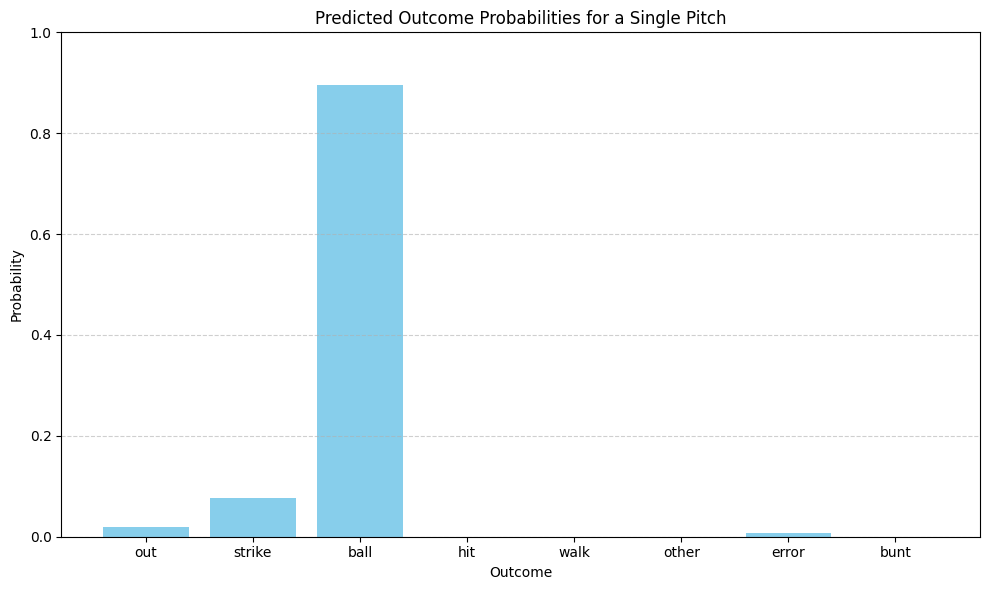

In [57]:
import matplotlib.pyplot as plt

# Reverse mapping: index → label
idx_to_label = {v: k for k, v in outcome_encoder.items()}

# Get predicted probabilities for first sample
first_probs = probs[0].detach().cpu().numpy()
labels = [idx_to_label[i] for i in range(len(first_probs))]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, first_probs, color='skyblue')
plt.title("Predicted Outcome Probabilities for a Single Pitch")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [58]:
average_probs = probs.mean(dim=0).detach().cpu().numpy()


Text(0.5, 1.0, 'Average Predicted Outcome Probabilities Across All Pitches')

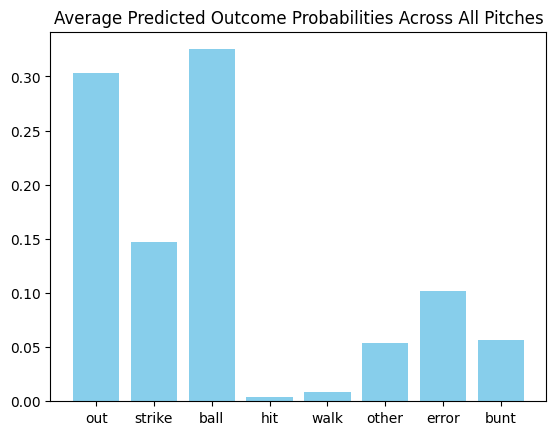

In [59]:
plt.bar(labels, average_probs, color='skyblue')
plt.title("Average Predicted Outcome Probabilities Across All Pitches")


In [54]:
import numpy as np
import pandas as pd

# Get predicted probabilities for the whole dataset
all_probs = predict_probabilities(X_tensor).detach().cpu().numpy()
pitch_types = X['pitch_type'].values


prob_df = pd.DataFrame(all_probs, columns=[idx_to_label[i] for i in range(all_probs.shape[1])])
prob_df['pitch_type'] = pitch_types

# Average outcome probability per pitch type
grouped = prob_df.groupby('pitch_type').mean().sort_values('out', ascending=False)
print(grouped)


                 out    strike      ball       hit      walk         other  \
pitch_type                                                                   
KN          0.064659  0.693387  0.194966  0.034647  0.006063  3.098958e-03   
SI          0.063379  0.437052  0.179306  0.196299  0.061086  2.295673e-03   
ST          0.063304  0.456500  0.338490  0.044839  0.063199  1.200137e-02   
KC          0.055277  0.377339  0.395733  0.070665  0.030197  7.378458e-03   
FS          0.051943  0.534387  0.263286  0.019925  0.031379  3.835668e-02   
PO          0.034306  0.291365  0.389896  0.117975  0.063711  8.596246e-03   
FC          0.032327  0.150461  0.590619  0.129194  0.068955  2.779721e-03   
CH          0.031868  0.357696  0.471805  0.056414  0.026337  3.178490e-03   
SL          0.027914  0.348437  0.529085  0.067926  0.006608  4.392502e-03   
SV          0.024419  0.215638  0.631397  0.073968  0.016874  7.755315e-04   
FF          0.019942  0.424502  0.404317  0.066790  0.058945  2.

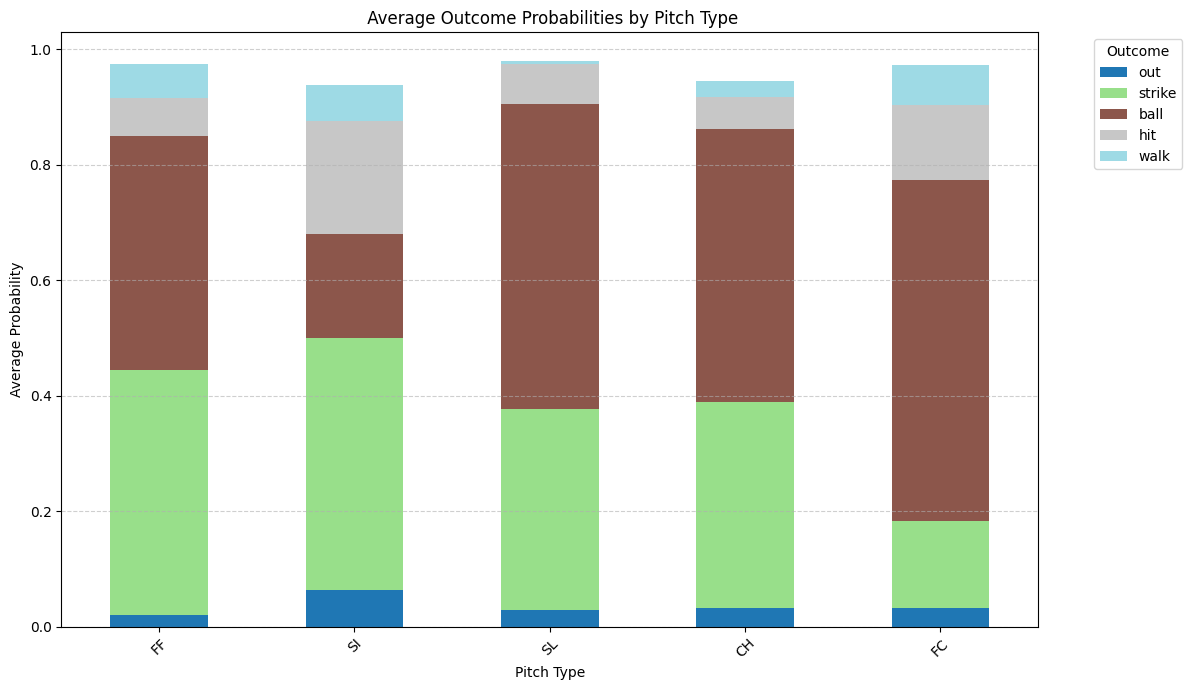

In [60]:
import matplotlib.pyplot as plt


top_pitches = prob_df['pitch_type'].value_counts().nlargest(5).index
grouped = grouped.loc[top_pitches]


outcome_cols = ['out', 'strike', 'ball', 'hit', 'walk']

# Plot stacked bar chart
ax = grouped[outcome_cols].plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title(" Average Outcome Probabilities by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Average Probability")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
def predict(X):
    predictive = pyro.infer.Predictive(model, guide=guide, num_samples=100)
    samples = predictive(X)["obs"]


    pred_classes, _ = samples.mode(dim=0)

    return pred_classes.cpu().numpy().astype(int)


In [49]:
y_true = y_tensor.cpu().numpy()
y_pred = predict(X_tensor)

from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")




Accuracy: 0.3968


In [61]:
def plot_predictions(preds):
    y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
    y_std = preds['obs'].T.detach().numpy().std(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    xlims = [-0.5, 1.5]
    ylims = [-1.5, 2.5]
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.xlabel("X", fontsize=30)
    plt.ylabel("Y", fontsize=30)

    ax.plot(x_true, y_true, 'b-', linewidth=3, label="true function")
    ax.plot(x_obs, y_obs, 'ko', markersize=4, label="observations")
    ax.plot(x_obs, y_obs, 'ko', markersize=3)
    ax.plot(x_test, y_pred, '-', linewidth=3, color="#408765", label="predictive mean")
    ax.fill_between(x_test, y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.6, color='#86cfac', zorder=5)

    plt.legend(loc=4, fontsize=15, frameon=False)

In [64]:
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.infer.mcmc import MCMC, NUTS

nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
mcmc.run(X_tensor, y_tensor)


predictive = Predictive(model=model, posterior_samples=mcmc.get_samples())
xlims = [-0.5, 1.5]
x_test = torch.linspace(xlims[0], xlims[1], 3000)
preds = predictive(x_test)

Warmup:   4%|▍         | 45/1200 [03:10,  2.28s/it, step size=5.35e-38, acc. prob=0.067]

KeyboardInterrupt: 

In [ ]:
predictive = Predictive(model, guide=mean_field_guide, num_samples=500)
preds = predictive(x_test)
plot_predictions(preds)